In [10]:
using Plots, ComplexPhasePortrait, ApproxFun
gr();

┌ Info: Recompiling stale cache file /Users/solver/.julia/compiled/v1.0/Interact/XmYW4.ji for Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1187


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/b104500992f9feefe59be1e72ffed14bba1ba460-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/b104500992f9feefe59be1e72ffed14bba1ba460-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

# M3M6: Methods of Mathematical Physics

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk



# Lecture 5: Residue Theorem


This lecture we cover

1. Contour integrals and Laurent coefficients
2. Isolated singularities
    - Residue at a point
2. Contour integrals in domains with multiple holes
    - The residue theorem
3. Calculated integrals
    - Application: Trigonometric integrals with rational functions

## Contour integrals and Laurent coefficients

In this course, we will _always_ think of Laurent series living on a circle $ \gamma_r(z_0) = \{z : |z-z_0| = r \}$. That is,
$$
    f(z) \approx \sum_{k=-\infty}^\infty f_k (z-z_0)^k
$$

for $z \in \gamma_r(z_0)$.  

**Proposition (Residue on a circle)** 
Suppose the Laurent series is absolutely summable on $\gamma_r$. Then 
$$
\oint_{\gamma_r} f(z) dz = 2 \pi i f_{-1}
$$
We refer to $f_{-1}$ as the _residue over $\gamma_r$_.

*Example* For all $0 < r < \infty$, 

$$
\oint_{\gamma_r} {1 \over z} dz = 2 \pi i
$$

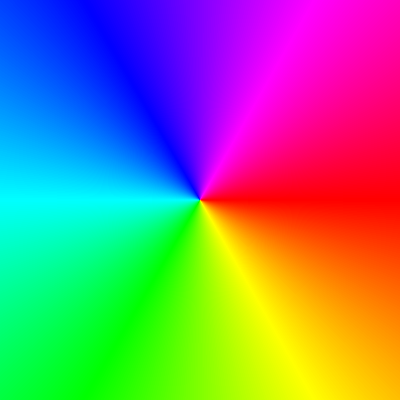

In [11]:
portrait(-2..2, -2..2, z-> 1/z)

In [13]:
γ = Circle(0.0, 1.0)
z = Fun(γ)
sum(1/z)

0.0 + 6.283185307179586im

_Example_ This works for functions not analytic:
$$
    \oint_{\gamma_1} (\sqrt{z-1}\sqrt{z+1})^3 dz 
    $$

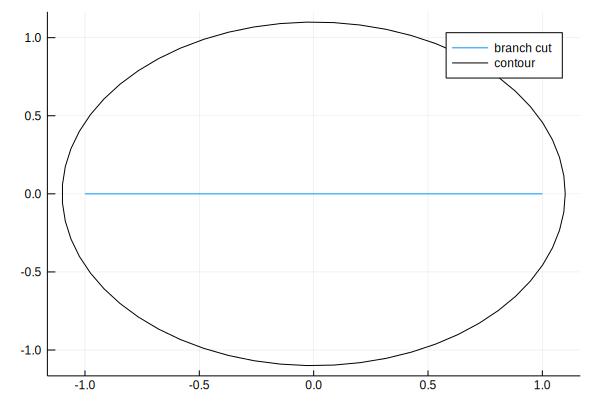

In [18]:
f = z -> (sqrt(z-1)*sqrt(z+1))^3

plot([-1,1],[0,0]; label="branch cut")
plot!(Circle(1.1); color=:black, label="contour")

In [19]:
@show sum(Fun(f, Laurent(Circle(1.1))))  # integral over circle
f₋₁ = Fun(f, Laurent(Circle(1.1))).coefficients[2] # numerical Laurent coefficient
@show 2π*im*f₋₁;

sum(Fun(f, Laurent(Circle(1.1)))) = -1.2751605303035503e-16 + 2.3561944901923444im
(2π) * im * f₋₁ = -1.1592368457305e-16 + 2.141994991083949im



When $f$ is holomorphic in a neighbourhood of the circle, we can extend it to an annulus (like Taylor series and disks):

**Proposition (Laurent series in an annulus)**
Suppose $f$ is holomorphic in an open annulus $A_{\rho R}(z_0) = \{z : \rho  < | z - z_0| < R\}$. Then the Laurent series converges uniformly in  any closed annulus inside $A_{\rho R}$

**Proof** _Exercise_.  Hint: use the decay in the Laurent coefficients $f_k$ from last lecture.


_Proposition (Residue on a circle)_ holds true regardless of the radius.

## Isolated singularities

**Definition (isolated singularity)** $f$ has an  _isolated singularity at_ $z_0$ if it is holomorphic in an open annulus with inner radius 0: 
$$
A_{0R}(z_0) = \{z : 0 < |z - z_0| < R \}.
$$


**Definition (Removable singularity)** $f$ has a _removable singularity at_ $z_0$ if it has an isolated singularity at $z_0$ and all negative terms in the Laurent series in $A_{0R}(z_0)$ are zero:
$$
f(z) = f_0 + f_1 (z-z_0) + f_2 (z-z_0)^2 + \cdots
$$

In [21]:
f = z -> (exp(z)-1)/z
f(0.0) 

NaN

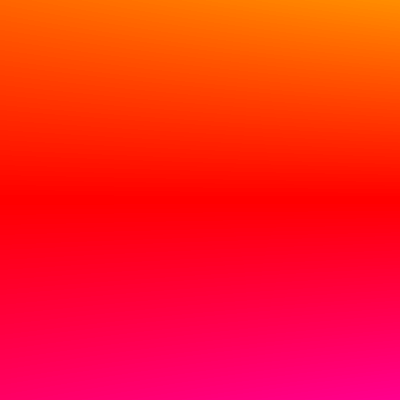

In [22]:
portrait(-1..1, -1..1, f) # no singularity appears because

**Proposition (Removing a removable singularity)** If  $f$ has a removable singularity at $z_0$, then
$$
\tilde f(z) = \begin{cases} f_0 & z = z_0 \\
                                f(z) & 0 < |z-z_0| < R
                                \end{cases}
$$
is analytic in the disk $B_R(z_0) = \{ z : |z-z_0| < R \}$, with a convergent Taylor series. Hence the name.

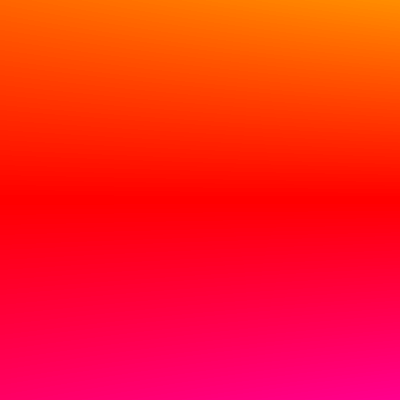

In [23]:
f̃ = z -> z ≈ 0 ? 1 : f(z)
portrait(-1..1, -1..1, f̃)

**Definition (simple pole)** $f$ has a  _simple pole at_ $z_0$ if it is holomorphic in 
$$
  A_{0R}(z_0) = \{z : 0 < |z - z_0| < R \}
$$ 
with only one negative term in the Laurent series in $A_{0R}(z_0)$:
$$
  f(z) = {f_{-1} \over z - z_0}  + f_0 + f_1 (z - z_0) + \cdots
$$
where $f_{-1} \neq 0$.

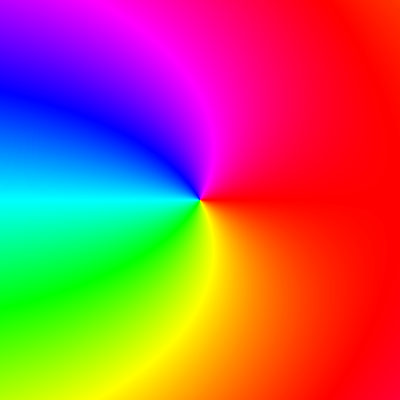

In [24]:
portrait(-1..1, -1..1, z -> exp(z)/z)

**Definition (higher order pole)** $f$ has a  _pole of order $N$ at_ ${z_0}$ if it is holomorphic in 
$$
 A_{0R}(z_0) = \{z : 0 < |z - z_0| < R \}
 $$
with only $N$ negative coefficients in the Laurent series:
$$
 f(z) = {f_{-N} \over (z - z_0)^N}  + {f_{1-N} \over (z - z_0)^{N-1}} +  \cdots + {f_{-1} \over z-z_0} + f_0 + f_1 (z-z_0) + \cdots
$$
where $f_{-N} \neq 0$.

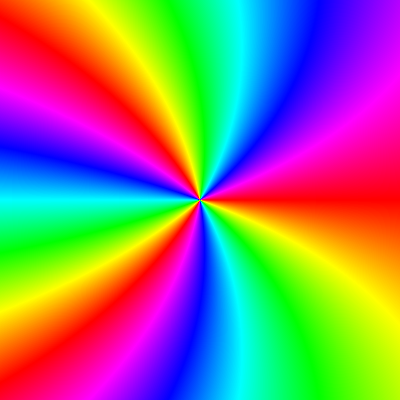

In [26]:
portrait(-1..1, -1..1, z -> exp(z)/z^3)


**Definition (essential singularity)** $f$ has an _essential singularity at_ $z_0$ if it is holomorphic in $A_{0R}(z_0)$ and has an infinite number of negative Laurent coefficients.

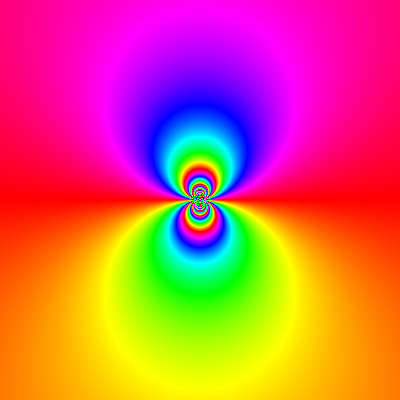

In [27]:
portrait(-1..1, -1..1, z -> exp(1/z))

In [28]:
sum(Fun(z -> exp(1/z), Circle())), 
2π*im*Fun(z -> exp(1/z), Laurent(Circle())).coefficients[2]

(-8.078182973046723e-16 + 6.283185307179586im, -8.078182973046723e-16 + 6.283185307179586im)

### Residue at a point

**Definition (Residue at a point)** Suppose $f$ has an isolated singularity at $z_0$, and is analytic in the annulus $A_{0R}(z_0)$ for some $R > 0$. Then we define the _residue at_ $z_0$ as
$$
{\underset{z = z_0}{\rm Res}}\, f(z) = f_{-1}
$$
where $f_{-1}$ is the first negative coefficent of the Laurent series in $A_{0R}(z_0)$. 

**Proposition (Residue of ratio of analytic functions with simple pole)** Suppose
$$
f(z) = {A(z) \over B(z)}
$$
and $A$, $B$ are analytic/holomorphic in a disk of radius $R$ around $z_0$ and that $B$ has only a single zero at $z_0$:
\begin{align*}
A(z) = A_0 + A_1(z-z_0) + \cdots \cr
B(z) = B_1(z-z_0) + \cdots
\end{align*}
Then ${\underset{z = z_0}{\rm Res}}\, f(z) = {A_0 \over B_1}$

**Exercise (Residue of ratio of analytic functions with higher order  poles)** What is the residue at $z_0$ if $B$ has a higher order zero: $B(z) = B_N (z-z_0)^N + \cdots$?

## Contour integrals on domains with multiple holes


Consider the following example:

$$ 
    {\sqrt{z-1}\sqrt{z+1} \over z^2 + 4}$$

We still have the contour integral over a circle, and so _Proposition (Residue on a circle)_ still holds true for $r > 2$. But we can also deform the contour into three contours:

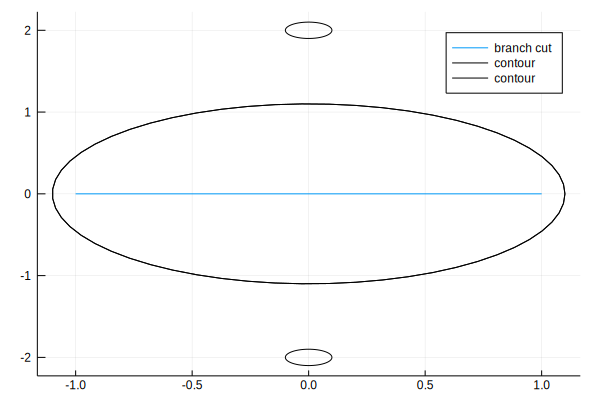

In [29]:
Γ = Circle(1.1) ∪ Circle(2.0im,0.1) ∪ Circle(-2.0im,0.1)
plot!(Γ; color=:black, label=:contour)

In [30]:
sum(Fun(f, Circle(2.1))), sum(Fun(f, Γ))

(4.782717259505325e-16 - 9.336183501133093e-16im, 2.555681169620637e-16 + 1.1200207106231122e-15im)

Thus we can sum over three residues.

### Residue theorem

**Theorem (Cauchy's Residue Theorem)** Let $f$ be holomprohic inside and on a simple closed, positively oriented contour $\gamma$ except at isolated points $z_1, \ldots, z_r$ inside $\gamma$. Then

$$\oint_\gamma f(z) dz = 2 \pi i \sum_{j=1}^r {\underset{z = z_j}{\rm Res}}\, f(z)$$

## Calculating integrals

We can use the Residue theorem to calculate "hard" integrals.

First, two trivial examples:

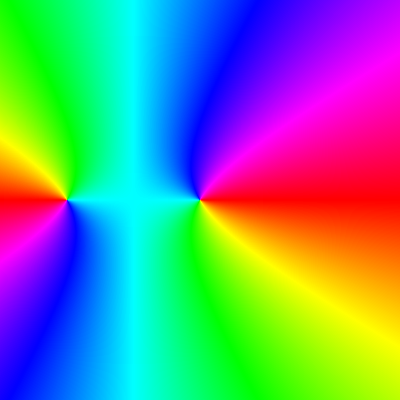

In [34]:
f = z -> 1/(z*(z+2))
portrait(-3..3, -3..3, f)

In [35]:
sum(Fun(f, Circle(3.0)))

7.874234295592502e-19 - 9.742139082662117e-17im

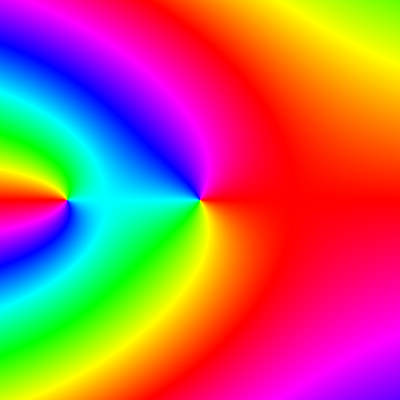

In [36]:
f = z -> exp(z)/(z*(z+2))
portrait(-3..3, -3..3, f)

In [37]:
sum(Fun(f, Circle(3.0)))

-5.073166565789438e-16 + 2.716424322002157im

In [38]:
2π*im*(1/2 - exp(-2)/2)

0.0 + 2.716424322002157im

In [39]:
sum(Fun(z -> exp(z)/(z^2*(z+2)), Circle(3.0)))

-2.313334476762615e-16 + 1.7833804925887144im

In [40]:
2*pi*im * (1/4 + exp(-2)/4)

0.0 + 1.783380492588715im

## Application: Integrals on the real line of rational functions

We can calculate integrals of the form 
$$\int_0^{2 \pi} R(\cos \theta, \sin \theta) d \theta$$
where $R(x,y)$ is rational by doing the change of variables $z = e^{i \theta}$ to reduce it to
$$\oint_{\gamma_1} R\left({z + z^{-1} \over 2}, {z - z^{-1} \over 2 i} \right) {d z \over i z}$$


*Example* Consider

$$\int_0^{2\pi} {d \theta \over 1 - 2\rho \cos \theta + \rho^2}$$

for $0 < \rho < 1$.

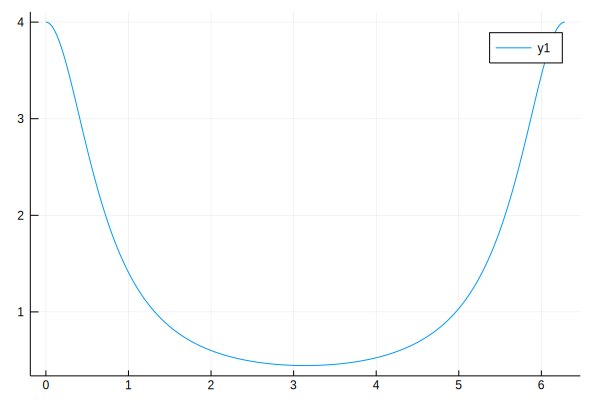

In [31]:
ρ = 0.5
plot(Fun(θ -> 1/(1-2ρ*cos(θ) + ρ^2), 0 .. 2π))

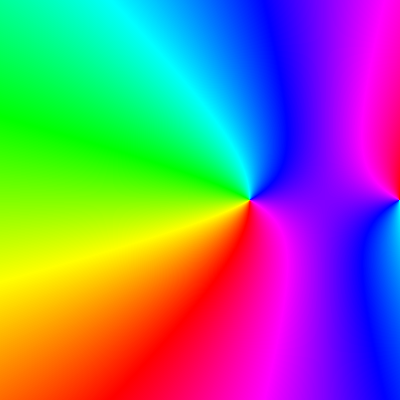

In [33]:
portrait(-2..2, -2..2, z ->  1/(1-ρ*(z+(z^(-1))) + ρ^2) * 1/(im*z))

In [43]:
sum(Fun(θ -> 1/(1-2ρ*cos(θ) + ρ^2), 0 .. 2π)), 2π /(1-ρ^2)

(8.377580409572783, 8.377580409572781)